We have completed our investigation into the driven oscillators and now we will begin looking into how coupled systems behave.

We'll use similar methods as before, simply applied to these more complicated scenarios.


In [1]:
 import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import pandas as pd
import seaborn as sns

(-5.0, 5.0)

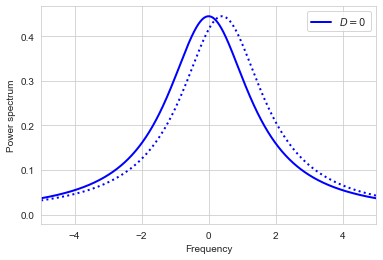

In [129]:
N = 5
a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
k2 = (10**4) * k1 # This keeps us in the lowest energy levels.

k1_2 = k1
k2_2 = k2 # Again looks strange but this will let us play around with values later on down the line.
 
Coupling_rate = 0
D = Coupling_rate * k1 # This 0.1 is a variable we can tweak 

detuning = 0.4 * k1 # Again this 0.4 is a variable that can be altered, chose it because its in the paper.
omega = 0
omega_2 = detuning + omega 

H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) # Here we have the Hamiltonian which contains the detuning between each oscillator.

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(k2) * (a1**2)

c3 = np.sqrt(k1) * a2.dag() # These are the collapse operators of the 2nd oscillator, they're the same here cause we have like oscillators
c4 = np.sqrt(k2) * (a2**2) # However, when we coupled different oscillators this will be how its done.

c5 = np.sqrt(D) * ( a1 - a2 ) # Disspative coupling term.
Collapse = [c1 , c2 ,c3, c4 , c5] 

wlist = np.linspace(-2, 4, 20000) * 2 * np.pi
spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec, 'b', lw=2, label='$D = 0$')
ax.plot(wlist , spec_2, 'b:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)


# We can clearly see that the detuning terms cause the peak frequencies to be shifted by said detuning.
# This is nice to see that the graphs and the equations are all in agreement etc...


(-5.0, 5.0)

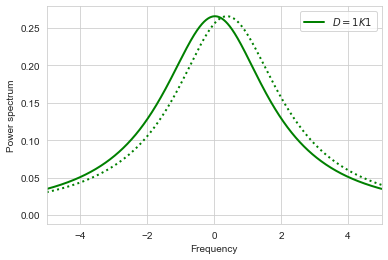

In [90]:
Coupling_rate = 1
D = Coupling_rate * k1

c5 = np.sqrt(D) * ( a1 - a2 )
Collapse = [c1 , c2 ,c3, c4 , c5] 

spec_k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_k1, 'g', lw=2, label='$D = 1K1 $')
ax.plot(wlist , spec_2_k1, 'g:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)



-0.10367774145553521

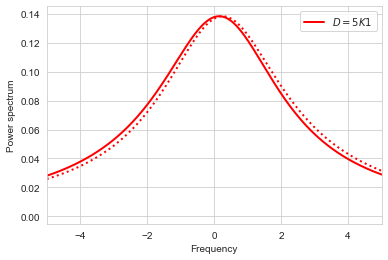

In [110]:
Coupling_rate = 5
D = Coupling_rate * k1

c5 = np.sqrt(D) * ( a1 - a2 )
Collapse = [c1 , c2 ,c3, c4 , c5] 

spec_5k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_5k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_5k1, 'r', lw=2, label='$D = 5K1 $')
ax.plot(wlist , spec_2_5k1, 'r:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)

wlist[(spec_5k1).argmax()]-wlist[(spec_2_5k1).argmax()]

-0.03581594704827448 0.182221484982458


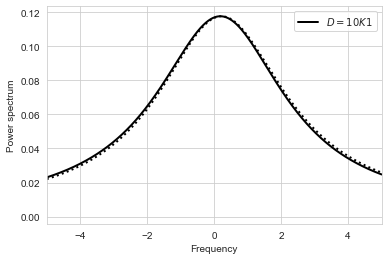

In [113]:
Coupling_rate = 10
D = Coupling_rate * k1

c5 = np.sqrt(D) * ( a1 - a2 )
Collapse = [c1 , c2 ,c3, c4 , c5] 

spec_10k1 = spectrum(H, wlist, Collapse, a1.dag(), a1)  
spec_2_10k1 = spectrum(H, wlist, Collapse, a2.dag(), a2)  

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec_10k1, 'k', lw=2, label='$D = 10K1 $')
ax.plot(wlist , spec_2_10k1, 'k:', lw=2)

ax.legend()
ax.set_xlabel('Frequency')
ax.set_ylabel('Power spectrum')
ax.set_xlim(-5,5)

Diff = wlist[(spec_10k1).argmax()]-wlist[(spec_2_10k1).argmax()]#We can see that the difference in frequency of each peak reduces as the drive increases as we'd expect.
value = wlist[(spec_10k1).argmax()] 
print (Diff , value)

# The difference tends to 0 and the actual value tends to (w1 + w2)/2 which is expected for idential oscillators.

(-5.0, 5.0)

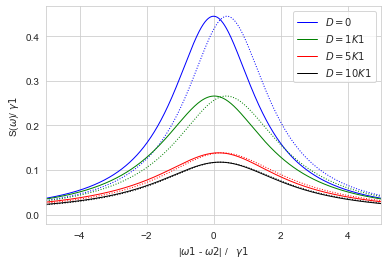

In [136]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)

ax.plot(wlist , spec, 'b', lw=1, label='$D = 0$')
ax.plot(wlist , spec_2, 'b:', lw=1)

ax.plot(wlist , spec_k1, 'g', lw=1, label='$D = 1K1 $')
ax.plot(wlist , spec_2_k1, 'g:', lw=1)

ax.plot(wlist , spec_5k1, 'r', lw=1, label='$D = 5K1 $')
ax.plot(wlist , spec_2_5k1, 'r:', lw=1)

ax.plot(wlist , spec_10k1, 'k', lw=1, label='$D = 10K1 $')
ax.plot(wlist , spec_2_10k1, 'k:', lw=1)

ax.legend()
ax.set_xlabel(r'|$ \omega1$ - $\omega2 $| /   $\gamma1$ ') 
ax.set_ylabel('S($\omega$)/ $\gamma1$ ')
ax.set_xlim(-5,5)


#Here we get a showcase of:
# How we can choose how offset the two oscillators are via the detuning ( Distance between peaks )
# The increase in coupling strength causes the oscillators to find a median frequency.


# The Bold line for the oscillator, dotted line for the oscillator it's coupled too.

Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

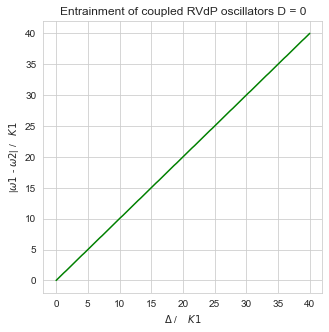

In [157]:
# From here, we can then go onto find the observed detunings as a function of initial detuning. Then do this for various coupling strengths.

N = 2
a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
k2 = (10**3) * k1 

k1_2 = k1
k2_2 = k2 
 
Coupling_rate = 0
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(k2) * (a1**2)

c3 = np.sqrt(k1) * a2.dag() 
c4 = np.sqrt(k2) * (a2**2) 

c5 = np.sqrt(D) * ( a1 - a2 ) 
Collapse = [c1 , c2 ,c3, c4 , c5]

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 100, 20000) * 2 * np.pi

frequency_list = []


for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2 = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec.argmax()]
    W_observed_2 = wlist[spec_2.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list , 'g' )

plt.title("Entrainment of coupled RVdP oscillators D = 0")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

#Here we can see that for 0 coupling between oscillators there is no entrainment of the rhythm at all.



Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

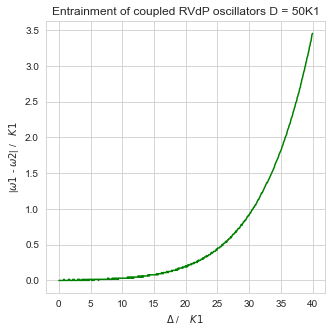

In [143]:
# From here, we can then go onto find the observed detunings as a function of initial detuning. Then do this for various coupling strengths.

N = 2
a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
k2 = (10**3) * k1 

k1_2 = k1
k2_2 = k2 
 
Coupling_rate = 50 # This is the variable we're interested in for these graphs as this will affect the synchronisation region.
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(k2) * (a1**2)

c3 = np.sqrt(k1) * a2.dag() 
c4 = np.sqrt(k2) * (a2**2) 

c5 = np.sqrt(D) * ( a1 - a2 ) 
Collapse = [c1 , c2 ,c3, c4 , c5]

d_range = np.linspace(0,40,500)
wlist = np.linspace(0, 50, 20000) * 2 * np.pi

frequency_list_50D = []


for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_50D = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_50D = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_50D.argmax()]
    W_observed_2 = wlist[spec_2_50D.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_50D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_50D , 'g' )

plt.title("Entrainment of coupled RVdP oscillators D = 50K1")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

#Here we can see that for 0 coupling between oscillators there is no entrainment of the rhythm at all.



Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

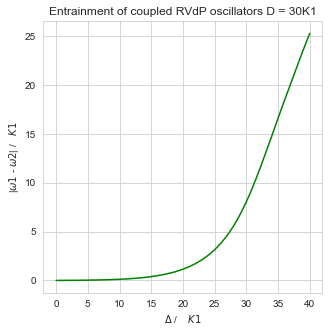

In [144]:
# From here, we can then go onto find the observed detunings as a function of initial detuning. Then do this for various coupling strengths.

N = 2
a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
k2 = (10**3) * k1 

k1_2 = k1
k2_2 = k2 
 
Coupling_rate = 30 # This is the variable we're interested in for these graphs as this will affect the synchronisation region.
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(k2) * (a1**2)

c3 = np.sqrt(k1) * a2.dag() 
c4 = np.sqrt(k2) * (a2**2) 

c5 = np.sqrt(D) * ( a1 - a2 ) 
Collapse = [c1 , c2 ,c3, c4 , c5]

d_range = np.linspace(0,40,500)
wlist = np.linspace(0, 50, 20000) * 2 * np.pi

frequency_list_30D = []


for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_30D = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_30D = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_30D.argmax()]
    W_observed_2 = wlist[spec_2_30D.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_30D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_30D , 'g' )

plt.title("Entrainment of coupled RVdP oscillators D = 30K1")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

#Here we can see that for 0 coupling between oscillators there is no entrainment of the rhythm at all.



Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

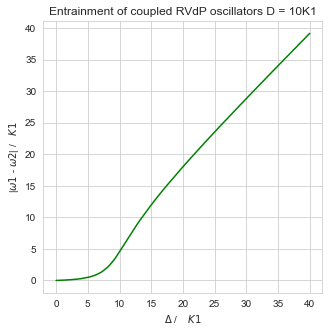

In [145]:
# From here, we can then go onto find the observed detunings as a function of initial detuning. Then do this for various coupling strengths.

N = 2
a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
k2 = (10**3) * k1 

k1_2 = k1
k2_2 = k2 
 
Coupling_rate = 10 # This is the variable we're interested in for these graphs as this will affect the synchronisation region.
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(k2) * (a1**2)

c3 = np.sqrt(k1) * a2.dag() 
c4 = np.sqrt(k2) * (a2**2) 

c5 = np.sqrt(D) * ( a1 - a2 ) 
Collapse = [c1 , c2 ,c3, c4 , c5]

d_range = np.linspace(0,40,500)
wlist = np.linspace(0, 50, 20000) * 2 * np.pi

frequency_list_10D = []


for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_10D = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_10D = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_10D.argmax()]
    W_observed_2 = wlist[spec_2_10D.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_10D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_10D , 'g' )

plt.title("Entrainment of coupled RVdP oscillators D = 10K1")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

#Here we can see that for 0 coupling between oscillators there is no entrainment of the rhythm at all.



Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

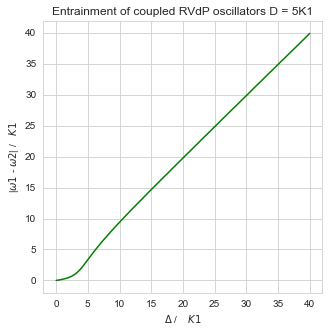

In [149]:
# From here, we can then go onto find the observed detunings as a function of initial detuning. Then do this for various coupling strengths.

N = 2
a1 = tensor(destroy(N) , qeye(N))
a2 = tensor(qeye(N), destroy(N))

k1 = 1
k2 = (10**3) * k1 

k1_2 = k1
k2_2 = k2 
 
Coupling_rate = 5 # This is the variable we're interested in for these graphs as this will affect the synchronisation region.
D = Coupling_rate * k1 

c1 = np.sqrt(k1) * a1.dag() 
c2 = np.sqrt(k2) * (a1**2)

c3 = np.sqrt(k1) * a2.dag() 
c4 = np.sqrt(k2) * (a2**2) 

c5 = np.sqrt(D) * ( a1 - a2 ) 
Collapse = [c1 , c2 ,c3, c4 , c5]

d_range = np.linspace(0,40,100)
wlist = np.linspace(0, 50, 20000) * 2 * np.pi

frequency_list_5D = []


for d in d_range :
    detuning = d * k1 
    omega = 0
    omega_2 = detuning + omega 

    H = (omega * a1.dag() * a1 + omega_2 * a2.dag() * a2) 

    spec_5D = spectrum(H, wlist, Collapse, a1.dag(), a1)  
    spec_2_5D = spectrum(H, wlist, Collapse, a2.dag(), a2)  
    
    W_observed = wlist[spec_5D.argmax()]
    W_observed_2 = wlist[spec_2_5D.argmax()]
    mod_W = np.abs(W_observed_2 - W_observed)
    frequency_list_5D.append(mod_W)
    

sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1, figsize=(5,5))
axes.plot(d_range , frequency_list_5D , 'g' )

plt.title("Entrainment of coupled RVdP oscillators D = 5K1")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 

#Here we can see that for 0 coupling between oscillators there is no entrainment of the rhythm at all.



Text(0, 0.5, '|$ \\omega1$ - $\\omega2 $| /   $K1$ ')

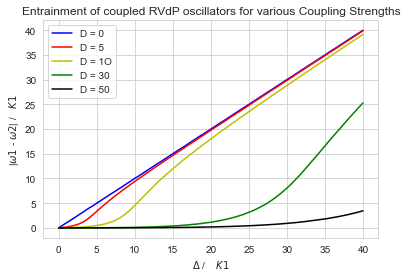

In [164]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(1, 1)
 
axes.plot(d_range , frequency_list , 'b' ,label = 'D = 0')
axes.plot(d_range , frequency_list_5D , 'r',label = 'D = 5' )
axes.plot(np.linspace(0,40,500) , frequency_list_10D , 'y',label = 'D = 1O' )
axes.plot(np.linspace(0,40,500) , frequency_list_30D , 'g' ,label = 'D = 30')
axes.plot(np.linspace(0,40,500) , frequency_list_50D , 'k' ,label = 'D = 50')
plt.legend()


plt.title("Entrainment of coupled RVdP oscillators for various Coupling Strengths")
plt.xlabel(r'$ \Delta $ /    $K1$ ')
plt.ylabel(r'|$ \omega1$ - $\omega2 $| /   $K1$ ') 


# Here it is quite clear to see that when we have little to no coupling , there is weak if no entrainment.
# When the coupling is very strong we see a plateud region much like the synchronisation region we saw with driven oscillators.
# These results are to be expected as this is very similar to how classical synchronisation would occur.


#Ultimately these graphs don't show anything new, they're just useful sanity checks that everything we've established is working as intended.
# I will move onto coupling these two RVdP oscillators for different sized limit cycles and seeing what happens.
#From there i'll pair the other oscillators in like pairs etc...



In [163]:
np.save('Coupled RVDP W vs Detuning, D=0' , frequency_list)
np.save('Coupled RVDP W vs Detuning, D=5' , frequency_list_5D)
np.save('Coupled RVDP W vs Detuning, D=10' , frequency_list_10D)
np.save('Coupled RVDP W vs Detuning, D=30' , frequency_list_30D)
np.save('Coupled RVDP W vs Detuning, D=50' , frequency_list_50D)